#  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
rain_df=pd.read_csv('Final Dataset/rainfall_prediction.csv')
rain_df.head()

,SUBDIVISION,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
0,ANDAMAN & NICOBAR ISLANDS,1981,1,10.68,23.80,17.21,20.72,94.20,7.29,11.1
1,ANDAMAN & NICOBAR ISLANDS,1981,2,12.99,27.48,20.21,8.59,94.10,7.15,27.8
2,ANDAMAN & NICOBAR ISLANDS,1981,3,16.50,30.73,23.59,34.10,93.97,7.05,1.7
3,ANDAMAN & NICOBAR ISLANDS,1981,4,21.06,35.07,28.04,35.36,93.78,9.35,94.1
4,ANDAMAN & NICOBAR ISLANDS,1981,5,23.54,36.59,30.04,64.94,93.66,8.31,270.8


In [3]:
rain_df.tail()

,SUBDIVISION,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
15115,LAKSHADWEEP,2015,8,23.50,30.79,27.12,252.07,93.80,10.68,146.4
15116,LAKSHADWEEP,2015,9,22.71,31.73,27.19,156.85,93.84,10.12,160.4
15117,LAKSHADWEEP,2015,10,20.19,31.95,26.05,48.28,94.07,7.45,165.4
15118,LAKSHADWEEP,2015,11,15.87,29.21,22.52,41.11,94.08,7.91,231.0
15119,LAKSHADWEEP,2015,12,12.21,25.75,18.96,11.60,94.27,8.04,159.0


# Data Visualization

## Univariate Analysis

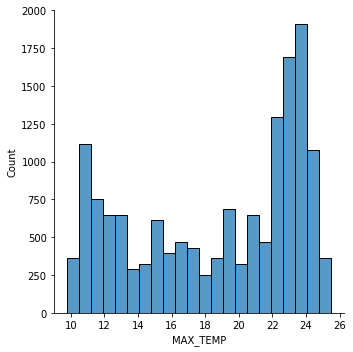

In [4]:
sns.displot(rain_df["MAX_TEMP"])

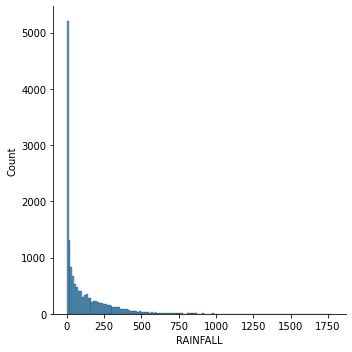

In [5]:


sns.displot(rain_df["RAINFALL"])

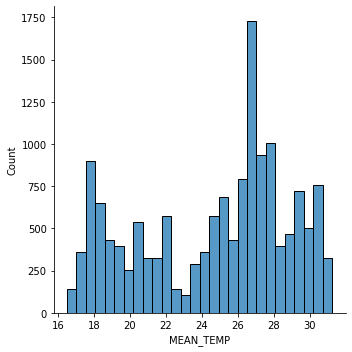

In [6]:
sns.displot(rain_df["MEAN_TEMP"])

## Bi-Variate Analysis

<AxesSubplot:xlabel='MONTH', ylabel='RAINFALL'>

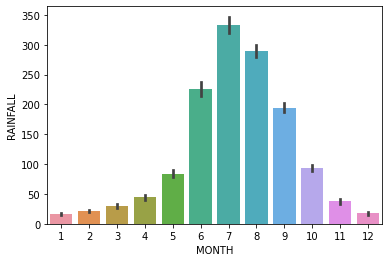

In [7]:
sns.barplot(x=rain_df.MONTH,y=rain_df.RAINFALL)

<AxesSubplot:xlabel='MONTH', ylabel='WIND_SPEED'>

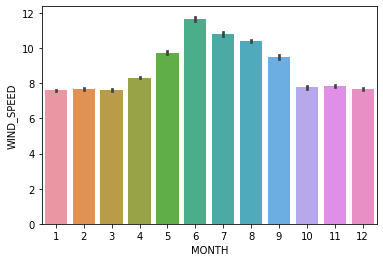

In [8]:
sns.barplot(x=rain_df.MONTH,y=rain_df.WIND_SPEED)

<AxesSubplot:xlabel='MONTH', ylabel='RAINFALL'>

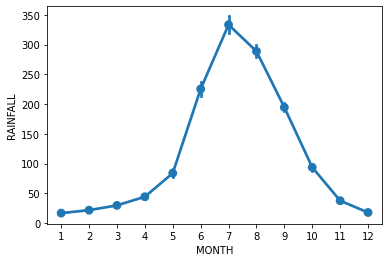

In [9]:
sns.pointplot(x=rain_df.MONTH,y=rain_df.RAINFALL)

## Multi-Variate Analysis

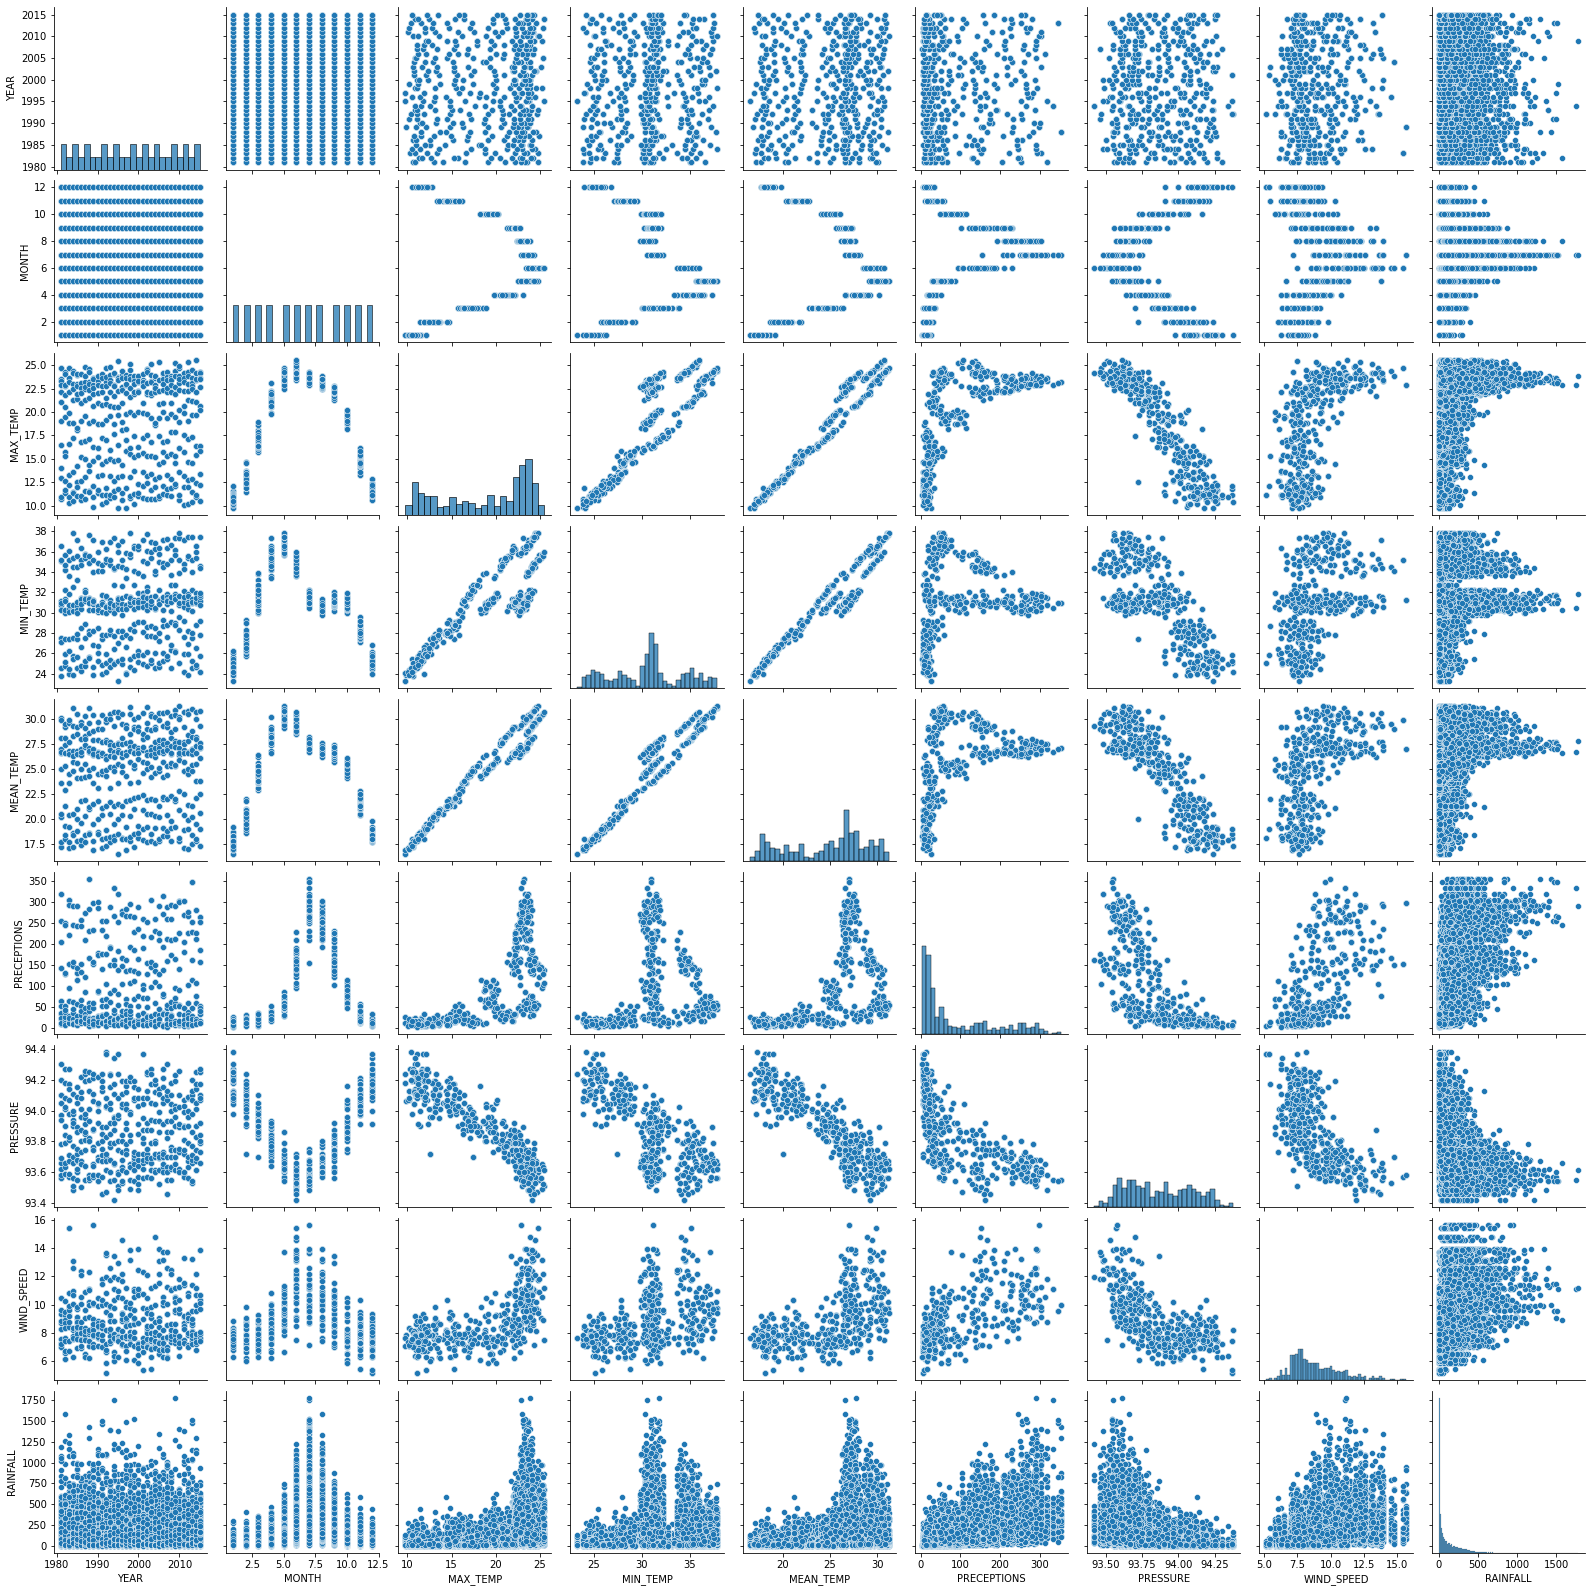

In [10]:
sns.pairplot(data=rain_df)

# Perform descriptive statistics on the dataset.

In [11]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  15120 non-null  object 
 1   YEAR         15120 non-null  int64  
 2   MONTH        15120 non-null  int64  
 3   MAX_TEMP     15120 non-null  float64
 4   MIN_TEMP     15120 non-null  float64
 5   MEAN_TEMP    15120 non-null  float64
 6   PRECEPTIONS  15120 non-null  float64
 7   PRESSURE     15120 non-null  float64
 8   WIND_SPEED   15120 non-null  float64
 9   RAINFALL     15120 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.2+ MB


In [12]:
rain_df.SUBDIVISION.unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [13]:
rain_df.describe()

,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,1998.000000,6.500000,18.733690,30.683143,24.684738,91.650214,93.864238,8.881357,115.578850
std,10.099839,3.452167,4.887405,3.708191,4.144350,96.136927,0.228435,1.884528,169.980029
min,1981.000000,1.000000,9.760000,23.270000,16.490000,2.440000,93.420000,5.210000,0.000000
25%,1989.000000,3.750000,13.920000,27.802500,20.947500,16.252500,93.670000,7.547500,5.100000
50%,1998.000000,6.500000,20.105000,30.940000,26.100000,42.450000,93.845000,8.395000,42.100000
75%,2007.000000,9.250000,23.180000,33.635000,27.685000,154.960000,94.070000,9.980000,164.400000
max,2015.000000,12.000000,25.500000,37.810000,31.250000,354.920000,94.380000,15.620000,1778.900000


In [14]:
rain_df.corr()

,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
YEAR,1.000000e+00,-3.569805e-16,0.040999,0.057944,0.050065,0.007486,0.029321,0.025835,-0.012344
MONTH,-3.569805e-16,1.000000e+00,0.111166,-0.099450,0.021053,0.245308,0.010055,0.064159,0.147486
MAX_TEMP,4.099868e-02,1.111663e-01,1.000000,0.857816,0.973184,0.686152,-0.918220,0.615318,0.479007
MIN_TEMP,5.794382e-02,-9.944965e-02,0.857816,1.000000,0.953036,0.244382,-0.759594,0.405961,0.202097
MEAN_TEMP,5.006517e-02,2.105255e-02,0.973184,0.953036,1.000000,0.513682,-0.881010,0.544254,0.372699
PRECEPTIONS,7.486181e-03,2.453079e-01,0.686152,0.244382,0.513682,1.000000,-0.710945,0.628133,0.650912
PRESSURE,2.932063e-02,1.005470e-02,-0.918220,-0.759594,-0.881010,-0.710945,1.000000,-0.661762,-0.503677
WIND_SPEED,2.583470e-02,6.415856e-02,0.615318,0.405961,0.544254,0.628133,-0.661762,1.000000,0.446566
RAINFALL,-1.234368e-02,1.474856e-01,0.479007,0.202097,0.372699,0.650912,-0.503677,0.446566,1.000000


# Check for Missing values and deal with them.

In [15]:
rain_df.isnull().sum()

SUBDIVISION    0
YEAR           0
MONTH          0
MAX_TEMP       0
MIN_TEMP       0
MEAN_TEMP      0
PRECEPTIONS    0
PRESSURE       0
WIND_SPEED     0
RAINFALL       0
dtype: int64

In [16]:
s=rain_df.corr()
s

,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
YEAR,1.000000e+00,-3.569805e-16,0.040999,0.057944,0.050065,0.007486,0.029321,0.025835,-0.012344
MONTH,-3.569805e-16,1.000000e+00,0.111166,-0.099450,0.021053,0.245308,0.010055,0.064159,0.147486
MAX_TEMP,4.099868e-02,1.111663e-01,1.000000,0.857816,0.973184,0.686152,-0.918220,0.615318,0.479007
MIN_TEMP,5.794382e-02,-9.944965e-02,0.857816,1.000000,0.953036,0.244382,-0.759594,0.405961,0.202097
MEAN_TEMP,5.006517e-02,2.105255e-02,0.973184,0.953036,1.000000,0.513682,-0.881010,0.544254,0.372699
PRECEPTIONS,7.486181e-03,2.453079e-01,0.686152,0.244382,0.513682,1.000000,-0.710945,0.628133,0.650912
PRESSURE,2.932063e-02,1.005470e-02,-0.918220,-0.759594,-0.881010,-0.710945,1.000000,-0.661762,-0.503677
WIND_SPEED,2.583470e-02,6.415856e-02,0.615318,0.405961,0.544254,0.628133,-0.661762,1.000000,0.446566
RAINFALL,-1.234368e-02,1.474856e-01,0.479007,0.202097,0.372699,0.650912,-0.503677,0.446566,1.000000


<AxesSubplot:>

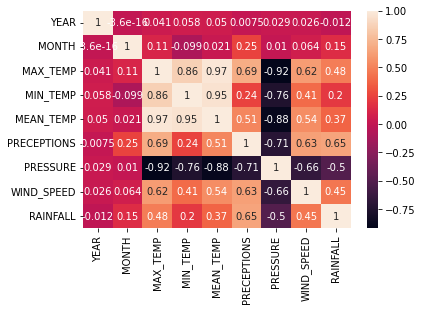

In [17]:
sns.heatmap(s,annot=True)

# Check for Categorical columns and perform encoding.

In [18]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  15120 non-null  object 
 1   YEAR         15120 non-null  int64  
 2   MONTH        15120 non-null  int64  
 3   MAX_TEMP     15120 non-null  float64
 4   MIN_TEMP     15120 non-null  float64
 5   MEAN_TEMP    15120 non-null  float64
 6   PRECEPTIONS  15120 non-null  float64
 7   PRESSURE     15120 non-null  float64
 8   WIND_SPEED   15120 non-null  float64
 9   RAINFALL     15120 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.2+ MB


In [19]:
rain_df.head()

,SUBDIVISION,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
0,ANDAMAN & NICOBAR ISLANDS,1981,1,10.68,23.80,17.21,20.72,94.20,7.29,11.1
1,ANDAMAN & NICOBAR ISLANDS,1981,2,12.99,27.48,20.21,8.59,94.10,7.15,27.8
2,ANDAMAN & NICOBAR ISLANDS,1981,3,16.50,30.73,23.59,34.10,93.97,7.05,1.7
3,ANDAMAN & NICOBAR ISLANDS,1981,4,21.06,35.07,28.04,35.36,93.78,9.35,94.1
4,ANDAMAN & NICOBAR ISLANDS,1981,5,23.54,36.59,30.04,64.94,93.66,8.31,270.8


In [20]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
rain_df.SUBDIVISION = lab.fit_transform(rain_df.SUBDIVISION)

rain_df.head()

,SUBDIVISION,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
0,0,1981,1,10.68,23.80,17.21,20.72,94.20,7.29,11.1
1,0,1981,2,12.99,27.48,20.21,8.59,94.10,7.15,27.8
2,0,1981,3,16.50,30.73,23.59,34.10,93.97,7.05,1.7
3,0,1981,4,21.06,35.07,28.04,35.36,93.78,9.35,94.1
4,0,1981,5,23.54,36.59,30.04,64.94,93.66,8.31,270.8


In [21]:
rain_df.SUBDIVISION.unique()

array([ 0,  1,  2, 21, 28, 10, 23, 15,  3,  9, 35, 31, 12, 24, 13, 14, 34,
        8, 33,  7, 11, 26, 17, 19, 20, 32,  4,  5, 30, 25, 29,  6, 22, 27,
       16, 18])

# Split the data into dependent and independent variables.

In [22]:
feature=rain_df[["SUBDIVISION","MAX_TEMP","MIN_TEMP","MEAN_TEMP","PRECEPTIONS","PRESSURE","WIND_SPEED"]]
target=rain_df["RAINFALL"]

In [23]:
acc=[]
model=[]

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=2)

In [25]:
X_train

,SUBDIVISION,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED
14492,16,22.57,31.06,26.79,193.59,93.63,8.59
6598,14,14.50,28.02,21.23,21.16,94.11,7.28
1554,21,23.41,31.20,27.28,290.72,93.61,13.95
8237,7,24.45,34.84,29.62,154.33,93.57,12.12
12007,30,23.22,30.54,26.85,218.93,93.68,8.98
...,...,...,...,...,...,...,...
11798,30,17.20,32.48,24.82,12.59,93.94,7.80
13896,27,10.50,23.81,17.13,17.29,93.98,7.57
6637,14,14.53,29.01,21.75,6.71,94.03,7.86
2575,23,22.82,30.28,26.52,241.93,93.62,8.38


In [26]:
y_train

14492    517.6
6598      21.8
1554     301.5
8237      93.5
12007    266.8
         ...  
11798      4.7
13896      2.1
6637     117.9
2575     460.9
7336      14.2
Name: RAINFALL, Length: 12096, dtype: float64

In [27]:
X_test

,SUBDIVISION,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED
12224,25,21.26,30.17,25.69,157.82,93.77,10.71
559,1,22.75,29.95,26.32,254.10,93.67,11.95
10735,32,23.26,30.54,26.87,237.03,93.57,13.91
13117,6,12.06,26.84,19.43,6.41,94.11,7.82
3670,3,15.69,28.71,22.18,31.97,94.08,7.29
...,...,...,...,...,...,...,...
946,2,14.78,28.20,21.47,15.52,94.21,9.00
12736,29,23.20,36.26,29.71,51.26,93.70,10.02
6162,13,23.86,31.60,27.70,230.07,93.60,8.76
12651,29,21.39,35.53,28.44,27.48,93.67,9.02


In [28]:
y_test

12224    130.9
559      294.3
10735    286.2
13117      0.0
3670       2.9
         ...  
946       16.2
12736     58.3
6162     141.3
12651     43.9
1404      11.1
Name: RAINFALL, Length: 3024, dtype: float64

# Build the Model

##  Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,classification_report,mean_squared_error,r2_score

In [30]:
# create a regressor object
dtregressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
dtregressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [31]:
# predicting with regression model with X and Y
y_train_pred=dtregressor.predict(X_train)
y_test_pred=dtregressor.predict(X_test)

In [32]:
#Mean Squared Error and r2 Score
print("MSE",mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred))
print((r2_score(y_train,y_train_pred),(r2_score(y_test_pred,y_test))))

MSE 1.2849086186512064e-35 7835.556844995924
(1.0, 0.7067282710416072)


In [33]:
#Accuracy Score
model.append('Decision Tree')
acc.append(dtregressor.score(X_test,y_test))
print(dtregressor.score(X_test,y_test))

0.7046122142643051


## Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression   

In [35]:
# create a regressor object
lregressor= LinearRegression()  

# fit the regressor with X and Y data
lregressor.fit(X_train, y_train) 

LinearRegression()

In [36]:
# predicting with regression model with X and Y
y_train_pred=lregressor.predict(X_train)
y_test_pred=lregressor.predict(X_test)

In [37]:
#Mean Squared Error and r2 Score
print("MSE",mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred))
print((r2_score(y_train,y_train_pred),(r2_score(y_test_pred,y_test))))

MSE 16065.274818205193 14772.075046140562
(0.4550019831839047, -0.14123745888356787)


In [38]:
#Accuracy Score
model.append('Linear Regression')
acc.append(lregressor.score(X_test,y_test))
print(lregressor.score(X_test,y_test))

0.44311672738515573


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
# create a regressor object
forest=RandomForestRegressor()

# fit the regressor with X and Y data
forest.fit(X_train,y_train)


RandomForestRegressor()

In [41]:
# predicting with regression model with X and Y
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)

In [42]:
#Mean Squared Error and r2 Score
print("MSE",mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred))
print((r2_score(y_train,y_train_pred),(r2_score(y_test_pred,y_test))))

MSE 606.4395350227155 4373.865444242976
(0.9794271590342344, 0.8119836662625688)


In [43]:
#Accuracy Score
model.append('Random Forest')
acc.append(forest.score(X_test,y_test))
print(forest.score(X_test,y_test))

0.835112366071862


# XGBOOST

In [44]:
from xgboost import XGBRegressor

In [45]:
# create a regressor object
xgb = XGBRegressor()

# fit the regressor with X and Y data
xgb.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [46]:
# predicting with regression model with X and Y
y_train_pred=xgb.predict(X_train)
y_test_pred=xgb.predict(X_test)

In [47]:
#Mean Squared Error and r2 Score
print("MSE",mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred))
print((r2_score(y_train,y_train_pred),(r2_score(y_test_pred,y_test))))

MSE 1672.6176475016923 4133.096613236487
(0.9432581570439723, 0.8149628352681572)


In [48]:
#Accuracy Score
model.append('XGB Boost')
acc.append(xgb.score(X_test,y_test))
print(xgb.score(X_test,y_test))

0.8441889605337601


# Evaluating Accuracy

In [49]:
data={'Algorithms':model,'Accuracy':acc}
AC=pd.DataFrame(data)
AC

,Algorithms,Accuracy
0,Decision Tree,0.704612
1,Linear Regression,0.443117
2,Random Forest,0.835112
3,XGB Boost,0.844189


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithms'>

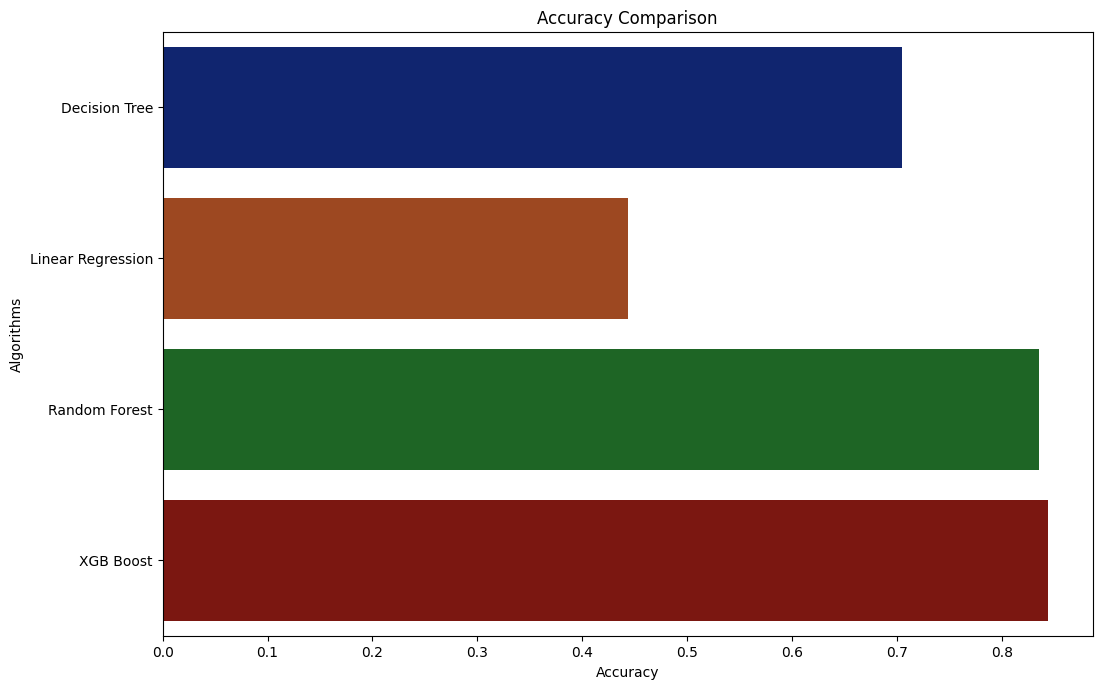

In [50]:
plt.figure(figsize=[12,8],dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x=acc,y=model,palette='dark')

# Save the Best Model

In [51]:
import pickle
file_name='Model/rainfall_prediction.pkl'
pkl=open(file_name,'wb')
pickle.dump(xgb,pkl)
pkl.close()